<a href="https://colab.research.google.com/github/dhyannnn/2030-Assignments/blob/main/Exercise%2022%20-%20Chaos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__Dhyan Thakkar__
<br>
Date: Mar. 9, 2022
<br>
PHYS 2030 W22

# <center><font color=#46769B>Exercise 22: Chaos</font></center>

## <font color=#46769B>Introduction</font>

The goals of this exercise are:
- Gain further experience with RK4 methods for solving ODEs
- Practice analyzing and manipulating your numerical solutions

Required reading:
- *Lesson 10: Second-order methods*


## <font color=#46769B>Exercise</font>

Here we consider a __driven damped pendulum__, given by the equation of motion

$$\theta''(t) + \gamma \theta'(t) + \omega^2 \sin(\theta(t)) = A \omega^2 \cos(\nu t) \, . \qquad (1)$$

The term on the right-hand side represents an external driving force that exerts a periodic torque to the pendulum arm, with (angular) frequency $\nu$ and amplitude $A$. (Note the form of the driving force here is different than for Kapitza's pendulum, for which the pivot was forced to move up and down.)

This system is one of the simplest dynamical systems that exhibits __chaotic motion__. How is chaos defined mathematically in this context? One necessarily condition is *sensitivity to initial conditions*, also known as the __butterfly effect__. Two trajectories, with very slightly different initial conditions, will diverge exponentially from one another and will have very different positions and velocities at some later time.

Suppose we have solved Eq. (1) *twice*, each for a different initial condition. For example, suppose solution 1 is labeled $\theta_1(t)$ and has initial condition

$$\theta_1(0) = \theta_0 , \quad \theta'_1(0) = 0$$

and solution 2 is labeled $\theta_2(t)$ and has initial condition

$$\theta_2(0) = \theta_0 + \epsilon , \quad \theta'_2(0) = 0$$

where $\epsilon$ is a very small number. The difference $\Delta \theta(t) = |\theta_1(t) - \theta_2(t)|$ as a function of time can be approximately parametrized as

$$\Delta \theta(t) \approx  \epsilon \, e^{\lambda t} \, . \qquad (2) $$

The exponent $\lambda$ is known as a __Lyapunov exponent__. 
- $\lambda > 0$ indicates chaotic motion, where tiny differences grow exponentially in time.
- $\lambda < 0$ indicates non-chaotic damped motion, where slightly different solutions converge to a common periodic trajectory.

(This is a bit of a simplification. Since we can also quantify the divergence in the *angular velocity* difference $|\theta'_1(t) - \theta'_2(t)|$, there are in fact two Lyapunov exponents for this setup. Here we keep it simple and only consider $\lambda$ as defined above. Further reading can be found [here](https://hypertextbook.com/chaos/lyapunov-1/) and [here](https://en.wikipedia.org/wiki/Lyapunov_exponent).)

Here we will consider the following parameters

$$\omega = 1.5 , \quad \gamma = 0.75 , \quad \nu = 1$$

and we will consider several values of $A$.

There is wonderful reference [here](http://galileoandeinstein.phys.virginia.edu/7010/CM_22a_Period_Doubling_Chaos.html) that covers this system in detail. I recommend taking a look there before you begin this exercise. The parameters chosen here match those adopted in this reference, although the notation is a bit different.

## <font color=#46769B>Part (a)</font>

First, write a code `RK4_method(theta0,A)` that can perform the RK4 method for the system in Eq. (1), for $t$ in the range $[0,100]$. Here the arguments are the initial condition $\theta_0 = \theta(0)$, and the amplitude $A$ for the driving term. Your code should perform a convergence test so that your solution converges within a tolerance of `atol=1e-2` and `rtol=1e-2`.

Using your code, perform the following tasks:
- Taking $\theta_0 = 0$ and $A=1.0$, solve for $\theta(t)$ and $\theta'(t)$.
- Make plot of $\theta(t)$ vs $t$. This case is *non-chaotic* motion. You will notice a few oscillations of varying height, known as *initial transients*, before your solution settles down into a regular pattern. Note by eye the time when the initial transients have gone.
- Make a phase portrait of $\theta'(t)$ vs $\theta(t)$ from your numerical solution. Make two versions of the plot (either separate or on top of each other):
    - For all values of $t$ in your numerical solution.
    - Only for values of $t$ *after* the initial transients have died away.
The latter plot makes clear that you have periodic motion. (But in the first plot it is nice to see how the trajectory is attracted to its periodic trajectory.) 
- Plot $\log_{10}\Delta \theta(t)$ vs $t$, taking $\epsilon = 10^{-3}$. Note that only *after* the transients have died away do we get 
- Calculate the Lyapunov exponent $\lambda$. To do this, you are fitting a straight line to your plot of $\log_{10}\Delta \theta(t)$ vs $t$ (only in the region after the transients). Feel free to be creative here, but it may be useful to use the function `numpy.polyfit(x,y,deg)`, where the `x` values are your values for $t$, the `y` values for $\log_{10}\Delta \theta)$, and `deg=1` fits a polynomial of degree 1. The slope is $\lambda$. Plot your straight line with slope $\lambda$ on your plot above.

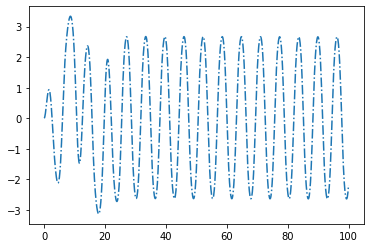

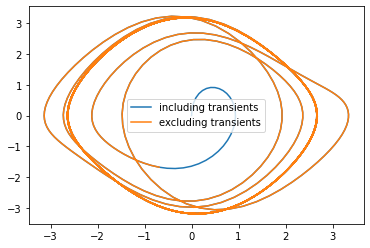

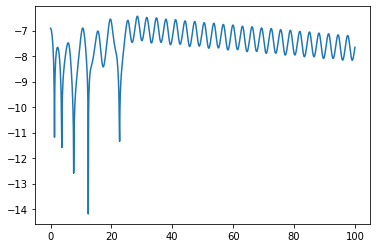

The Lyapunov Exponent is  0.00473783118147915


In [13]:
import numpy as np
import matplotlib.pyplot as plt

omega = 1.5
gamma = 0.75
t0, tf = 0, 100
nu = 1
num_steps = 1000
theta_0 = 0 

A = 1 
def f(t,y):
    y1, y2 = y
    return np.array([y2,-gamma*y2 -omega**2*np.sin(y1) + A*omega**2*np.cos(nu*t)])


def RK4_method(theta_0,A):
    
    t = np.linspace(t0,tf,num=num_steps+1)
    h = t[1] - t[0]
    
    # initialize output
    y = np.zeros((num_steps+1,2))
    y[0] = [theta_0,0]
    
    for i in range(num_steps):
        
        ti = t[i]
        yi = y[i]
        
        k1 = f(ti,yi) # Stage 1
        k2 = f(ti+0.5*h,yi+0.5*h*k1) # Stage 2
        k3 = f(ti+0.5*h,yi+0.5*h*k2) # Stage 3
        k4 = f(ti+h,yi+h*k3) # Stage 4
        
        # Final slope
        k = (k1 + 2*k2 + 2*k3 + k4)/6
        
        y[i+1] = yi + h*k
        
    return t, y

t, y = RK4_method(0,1) 
theta = y[:,0]
plt.plot(t,theta,'-.',label="RK4 method")
plt.show()
theta_prime = y[:,1]
plt.plot(theta,theta_prime, label ='including transients')
plt.plot(theta[30:],theta_prime[30:], label = 'excluding transients')
plt.legend()
plt.show()


epsilon = 10**-3
theta1 = theta_0 + epsilon 
t1 , y1 = RK4_method(theta1,A)
theta1 = y1[:,0]
delta_theta = np.abs(theta1 - theta)
log = np.log(delta_theta)
plt.plot(t, log)
plt.show()
lamb = np.polyfit(t, log, 1)
print('The Lyapunov Exponent is ', lamb[0])

## <font color=#46769B>Part (b)</font>

Now repeat the tasks from Part (a) with a new value of $A = 1.18$, which yields *chaotic* motion. A few notes:
- Since it is not clear here what are initial transients, you need not remove them. 
- Your phase portrait will not exhibit periodic motion.
- For calculating the Lyapunov exponent $\lambda$, take $\epsilon=10^{-10}$. (It is helpful to choose small $\epsilon$ for $\lambda > 0$ since the differences will grow and larger $\epsilon$ for $\lambda < 0$ since differences will shrink.)



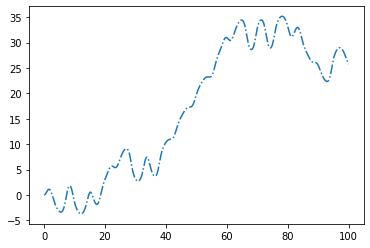

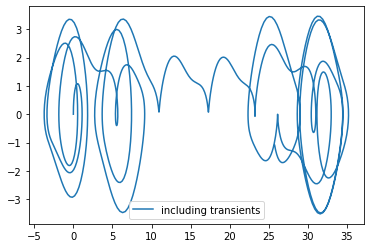

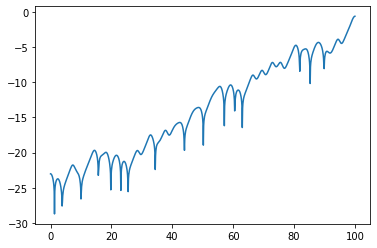

The Lyapunov Exponent is  0.2325119784705898


In [16]:
import numpy as np
import matplotlib.pyplot as plt

omega = 1.5
gamma = 0.75
t0, tf = 0, 100
nu = 1
num_steps = 1000
theta_0 = 0 

A1 = 1.18 
def f(t,y):
    y1, y2 = y
    return np.array([y2,- gamma*y2 - omega**2*np.sin(y1) + A1*omega**2*np.cos(nu*t)])


def RK4_method(theta_0,A):
    
    t = np.linspace(t0,tf,num=num_steps+1)
    h = t[1] - t[0]
    
    # initialize output
    y = np.zeros((num_steps+1,2))
    y[0] = [theta_0,0]
    
    for i in range(num_steps):
        
        ti = t[i]
        yi = y[i]
        
        k1 = f(ti,yi) # Stage 1
        k2 = f(ti+0.5*h,yi+0.5*h*k1) # Stage 2
        k3 = f(ti+0.5*h,yi+0.5*h*k2) # Stage 3
        k4 = f(ti+h,yi+h*k3) # Stage 4
        
        # Final slope
        k = (k1 + 2*k2 + 2*k3 + k4)/6
        
        y[i+1] = yi + h*k
        
    return t, y

t2 , y2 = RK4_method(theta_0, A1) 
theta2 = y2[:,0]
plt.plot(t2,theta,'-.',label="RK4 method")
plt.show()
theta_prime = y2[:,1]
plt.plot(theta,theta_prime, label ='including transients')
plt.legend()
plt.show()

epsilon1 = 10**-10
theta3 = theta_0 + epsilon1 
t3 , y3 = RK4_method(theta3,A1)
theta3 = y3[:,0]
delta_theta1 = np.abs(theta3 - theta2)
log1 = np.log(delta_theta1)
plt.plot(t3, log1)
plt.show()
lamb1 = np.polyfit(t3, log1, 1)
print('The Lyapunov Exponent is ', lamb1[0])